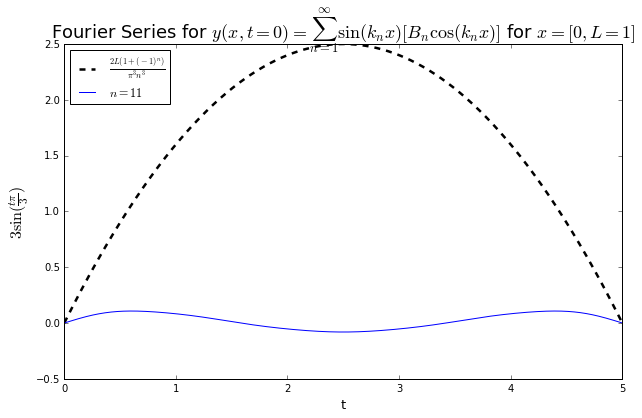

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes as zoom
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import pylab

def main_1(n):
    """main program"""
    def c_n1(n):
            """Finds constants for n terms in part (a)"""
            L=5
            return (8*(1-(-1)**n)*L) / ((np.pi**3)*(n**3)) 
            #return (-2*k_n*np.sin(k_n)-4*np.cos(k_n)+4) / (k_n**3)
            #return (-8*(-1)**n+8) / (n**3*np.pi**3)
            
    def f_n1(n, func):
            """function values using constant c_n values"""
            L=5
            x = 1
            n_steps = 1000
            y = np.zeros((n_steps))
            x = np.linspace(0, L, n_steps)
            #print(x) # for testing

            for num in x:
                sum0 = 0
                for i in range(2, n+1): # 1 to n
                    k_n = np.pi*i / L
                    sum0 += np.sin(k_n*num)*func(i)
                y[np.where(x==num)] = sum0

            return y, x
    
    y, x = f_n1(n, c_n1)
    return y, x, n

    
def part_a():
    """executes all functions for part (a)"""
    L=5
    fig1 = plt.figure()
    plt.title(r"Fourier Series for $y(x,t=0)=\sum_{n=1}^{\infty} \sin(k_nx)[B_n\cos(k_nx)]$ for $x=[0,L=1]$", 
              fontsize="18")
    
    # resizing graph
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 6
    plt.rcParams["figure.figsize"] = fig_size

    # assigning variables
    y, x, n = main_1(11)
    
    actual_y = np.zeros_like(x)
    for num in x:
        i = 2*num*(L-num) / L
        actual_y[np.where(x==num)] = i
     
    ax1 = fig1.add_subplot(111)
    ax1.plot(x, actual_y, 'k--', linewidth="2.5", label=r"$\frac{2L(1+(-1)^n)}{\pi^3n^3}$")
    ax1.plot(x, y, 'b', label=r"$n={0}$".format(n))
    #ax1.plot(t, f_t_values2, 'g', label=r"$n={0}$".format(n2))
    #ax1.plot(t, f_t_values3, 'r', label=r"$n={0}$".format(n3))
    #ax1.plot(t, f_t_values4, 'c', label=r"$n={0}$".format(n4))
    ax1.legend(loc=2)
    plt.xlabel("t", fontsize="13")
    plt.ylabel(r"$3\sin(\frac{t\pi}{3})$", fontsize="16")
    
    # for smaller zoomed plot, can remove if we want.  Only there for extra detail
    #ax_inset = zoom(ax1, 2.5, loc=4)
    #ax_inset.plot(t, actual_f_t, 'k--')
    #ax_inset.plot(t, f_t_values1, 'b')
    #ax_inset.plot(t, f_t_values2, 'g')
    #ax_inset.plot(t, f_t_values3, 'r')
    #ax_inset.plot(t, f_t_values4, 'c')
    #x1, x2, y1, y2 = -0.1, 0.1, -0.5, 0.5
    #ax_inset.set_xlim(x1, x2) 
    #ax_inset.set_ylim(y1, y2)
    #plt.yticks(visible=False)
    #plt.xticks(visible=False)
    #mark_inset(ax1, ax_inset, loc1=1, loc2=3, fc="none", ec="0.5")
    
    # save figure
    #pylab.savefig('part_a_plot.png')
    
if __name__ == '__main__':
    part_a()